In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/data.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1) Problem statement
- This Project understands how test scores are getting affected by change in other variables like Gender, race_ethnicity, parental_level_of_education, lunch etc

###  2) Dataset Information


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.shape

(1000, 8)

### 2.1 Data checks to Perform
- Check Missing Values
- Check Duplicate Values
- Check Unique Values in each Column
- Check various categories in categorical variables
- Check Statistics of Dataset

In [5]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [9]:
data.race_ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [10]:
data.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [11]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [12]:
data.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [13]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- Number of Missing Values = 0
- Number of Duplicate Values = 0
- Number of Unique Values in Each Columns
    - gender                           2
    - race_ethnicity                   5
    - parental_level_of_education      6
    - lunch                            2
    - test_preparation_course          2
- Number of Categories in Categorical Variables
    - gender : 2
    - race_ethnicity : 5
    - parental_level_of_education : 6
    - lunch : 2
    - test_preparation_course : 2
- Statistics of Data
    - From above description, the mean of all the columns is close to each other
    - standard deviation is also almost close between 14.5 to 15.2
    - Them Min number of marks in math is 0 while in Reading and Writing are 17 and 10 respectively

# Feature Engineering

In [14]:
numberical_variables = [feature for feature in data.columns if data[feature].dtype != 'O']
numberical_variables


['math_score', 'reading_score', 'writing_score']

In [15]:
categorical_variables = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_variables


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Number of Numerical and Categorical Features
    - Numerical : 3
    - Categorical : 5

In [16]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

data['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [18]:
data['average'] = data['total_score']/3

data['average']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average, Length: 1000, dtype: float64

In [19]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Created Columns for total_score and average

In [20]:
math_full = data[data['math_score'] == 100]['average'].count()
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
total_full = data[data['total_score'] == 300]['average'].count()
print('Number of Students having full marks in math : ', math_full)
print('Number of Students having full marks in reading : ', reading_full)
print('Number of Students having full marks in writing : ', writing_full)
print('Number of Students full total marks : ', total_full)

Number of Students having full marks in math :  7
Number of Students having full marks in reading :  17
Number of Students having full marks in writing :  14
Number of Students full total marks :  3


In [21]:
data['total_score'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total_score, dtype: float64

### 3) Exploring Data (Visualization)

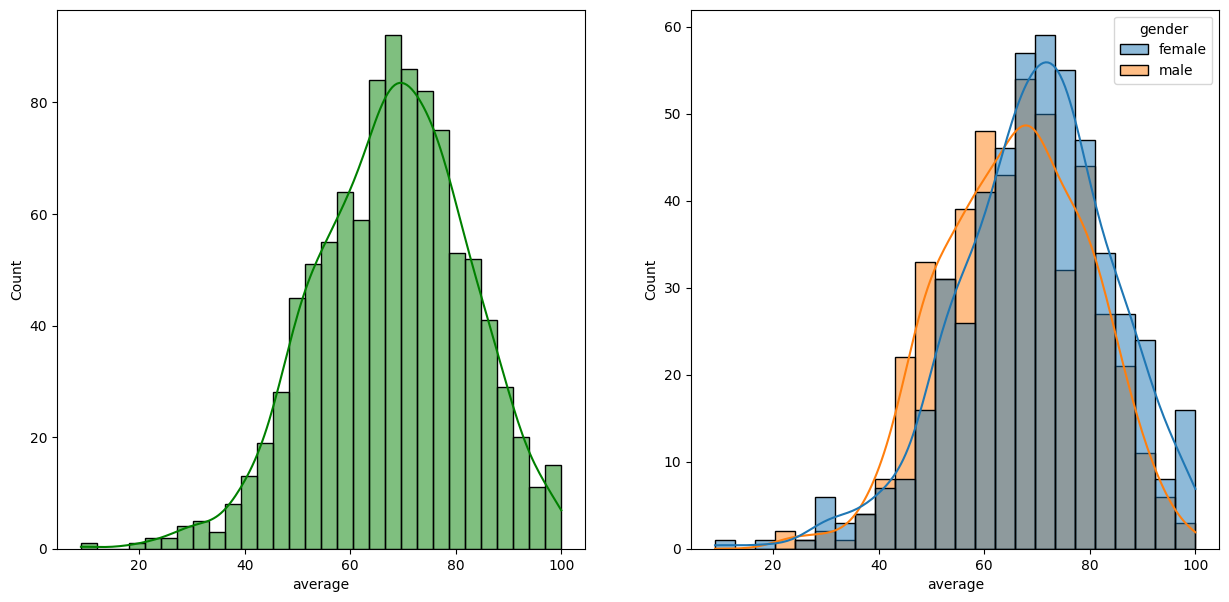

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='average', kde=True, hue='gender')
plt.show()

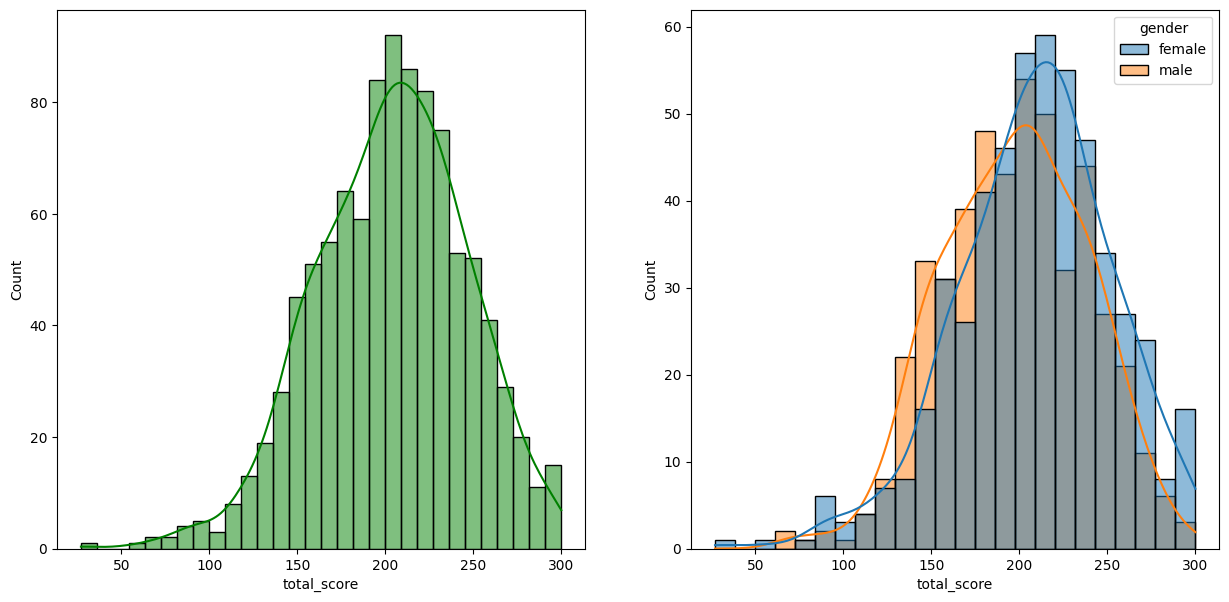

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='total_score', kde=True, hue='gender')
plt.show()

##### Insights 
    - Female Students have better marks then Male Students

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\1598541210.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\NR\AppData\Local\Temp\ipykernel_14616\1598541210.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\NR\AppData\Local\Temp\ipykernel_14616\1598541210.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<AxesSubplot: xlabel='average', ylabel='Count'>

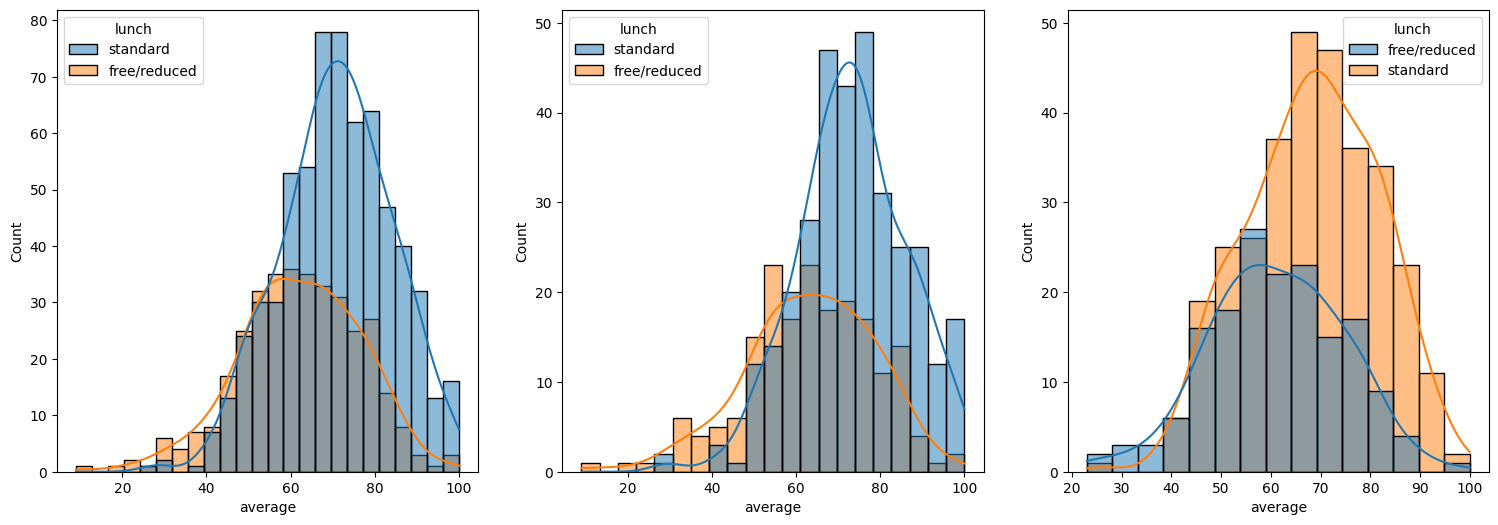

In [24]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True, hue='lunch')

### Insights
    - Standard Lunch helped students to perform well
    - Standard Lunch helped both male and female students to perform well

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\3325993228.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\NR\AppData\Local\Temp\ipykernel_14616\3325993228.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\NR\AppData\Local\Temp\ipykernel_14616\3325993228.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


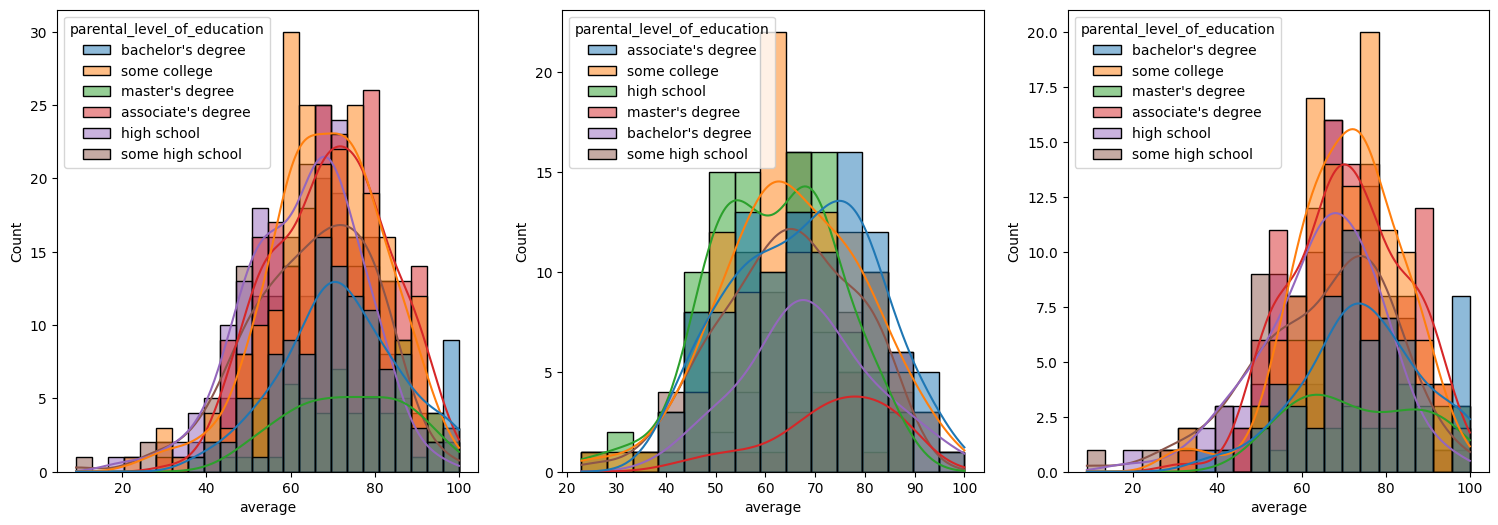

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [26]:
data['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [27]:
data[data['parental_level_of_education'] == "master's degree"]['average'].describe()

count    59.000000
mean     73.598870
std      13.601017
min      44.666667
25%      63.166667
50%      73.333333
75%      85.500000
max      97.666667
Name: average, dtype: float64

In [28]:
data[data['parental_level_of_education'] == "bachelor's degree"]['average'].describe()

count    118.000000
mean      71.923729
std       13.946609
min       39.000000
25%       64.083333
50%       71.166667
75%       80.666667
max      100.000000
Name: average, dtype: float64

In [29]:
data[data['parental_level_of_education'] == "some high school"]['average'].describe()

count    179.000000
mean      65.108007
std       14.984078
min        9.000000
25%       55.666667
50%       66.666667
75%       76.500000
max       99.000000
Name: average, dtype: float64

In [30]:
data[data['parental_level_of_education'] == "high school"]['average'].describe()

count    196.000000
mean      63.096939
std       13.510583
min       18.333333
25%       53.916667
50%       65.000000
75%       72.666667
max       95.666667
Name: average, dtype: float64

In [31]:
data[data['parental_level_of_education'] == "associate's degree"]['average'].describe()

count    222.000000
mean      69.569069
std       13.670914
min       31.666667
25%       58.666667
50%       69.666667
75%       79.000000
max      100.000000
Name: average, dtype: float64

In [32]:
data[data['parental_level_of_education'] == "some college"]['average'].describe()

count    226.000000
mean      68.476401
std       13.710974
min       23.333333
25%       60.000000
50%       68.666667
75%       78.000000
max       99.000000
Name: average, dtype: float64

### Insights
    - generally the parental level of education does not effect the student's performance
    - Above data shows that students having parental_lavel_of_education associate's degree or master's degree are performing better

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\906186332.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\NR\AppData\Local\Temp\ipykernel_14616\906186332.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\NR\AppData\Local\Temp\ipykernel_14616\906186332.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


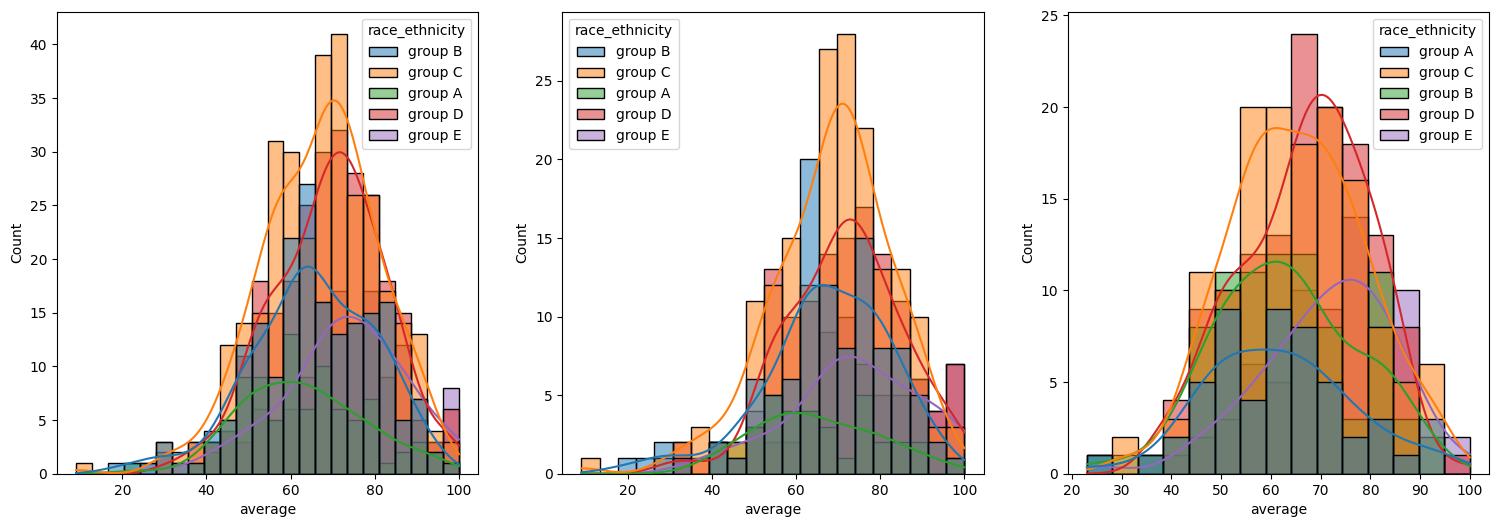

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [34]:
data['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [35]:
data.loc[(data['race_ethnicity'] == 'group A') & (data['average'] < 50)].shape

(16, 10)

In [36]:
data.loc[(data['race_ethnicity'] == 'group B') & (data['average'] < 50)].shape

(27, 10)

In [37]:
data.loc[(data['race_ethnicity'] == 'group C') & (data['average'] < 50)].shape

(32, 10)

In [38]:
data.loc[(data['race_ethnicity'] == 'group D') & (data['average'] < 50)].shape

(19, 10)

In [39]:
data.loc[(data['race_ethnicity'] == 'group E') & (data['average'] < 50)].shape

(9, 10)

In [40]:
data[data['race_ethnicity'] == 'group B']['average'].describe()

count    190.000000
mean      65.468421
std       14.732133
min       18.333333
25%       56.666667
50%       65.000000
75%       76.833333
max       96.666667
Name: average, dtype: float64

In [41]:
data[data['race_ethnicity'] == 'group C']['average'].describe()

count    319.000000
mean      67.131661
std       13.872211
min        9.000000
25%       57.666667
50%       68.333333
75%       77.000000
max       98.666667
Name: average, dtype: float64

In [42]:
data[data['race_ethnicity'] == 'group D']['average'].describe()

count    262.000000
mean      69.179389
std       13.252776
min       31.000000
25%       60.333333
50%       70.000000
75%       78.583333
max       99.000000
Name: average, dtype: float64

In [43]:
data[data['race_ethnicity'] == 'group E']['average'].describe()

count    140.000000
mean      72.752381
std       14.565016
min       26.000000
25%       64.666667
50%       73.500000
75%       82.416667
max      100.000000
Name: average, dtype: float64

### Insights
    - Group C and Group B has most number of failed Students 

In [44]:
data[data[]]['average'].describe()
# data[data.gender=='female']['average']

SyntaxError: invalid syntax (2279446821.py, line 1)

### Insights
    - Students of Group A and
    - Above data shows that students having parental_lavel_of_education associate's degree or master's degree are performing better

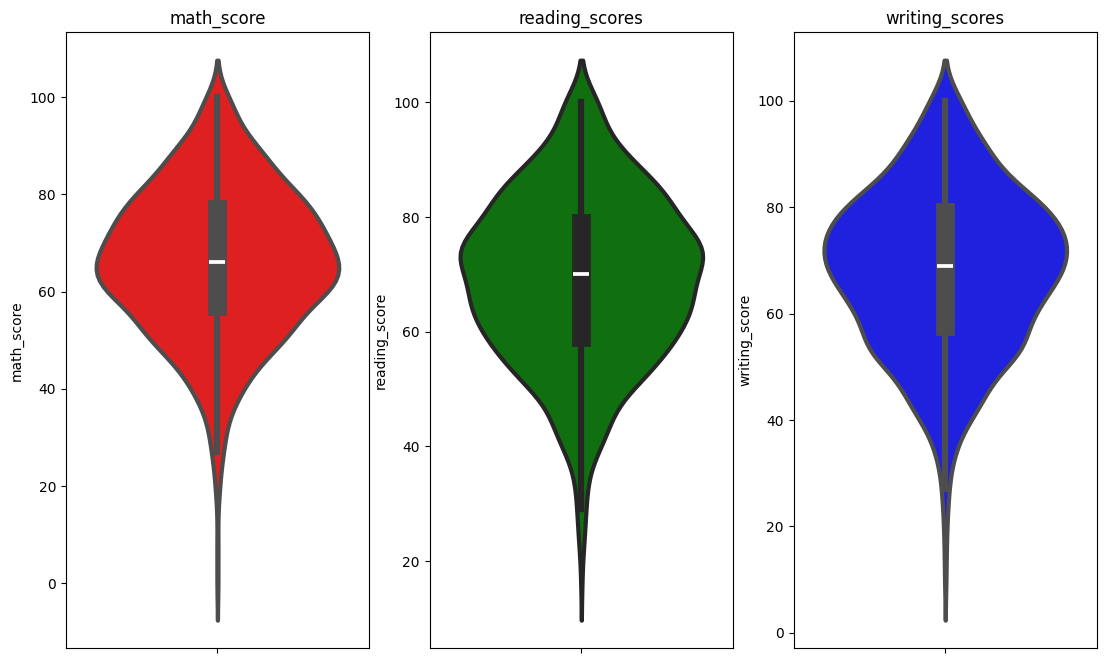

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('math_score')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('reading_scores')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing_scores')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

(-1.25, 1.25, -1.25, 1.25)

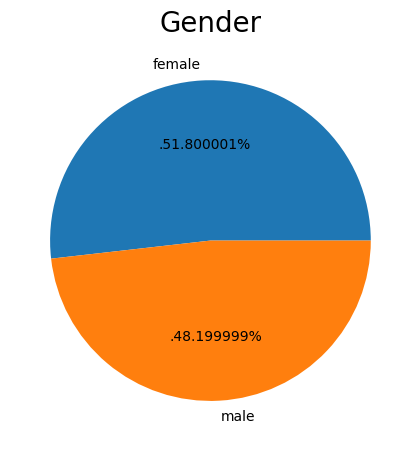

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)

plt.pie(data['gender'].value_counts(), labels = data['gender'].value_counts().index, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

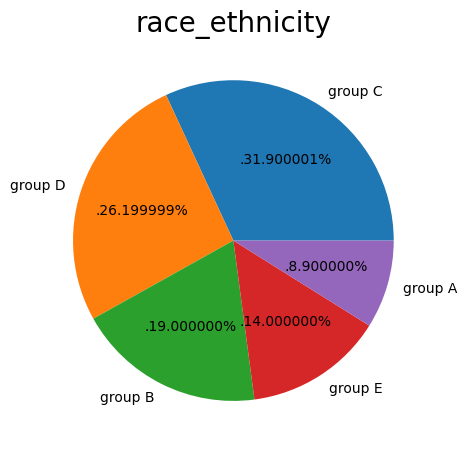

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)

plt.pie(data['race_ethnicity'].value_counts(), labels = data['race_ethnicity'].value_counts().index, autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

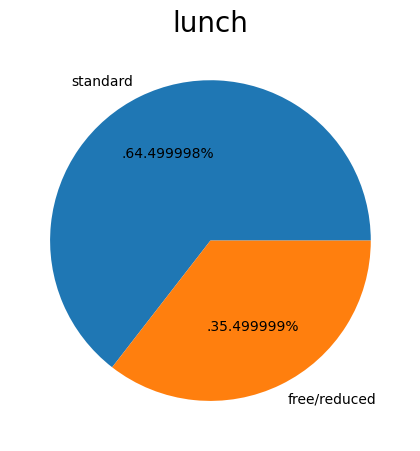

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)

plt.pie(data['lunch'].value_counts(), labels = data['lunch'].value_counts().index, autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

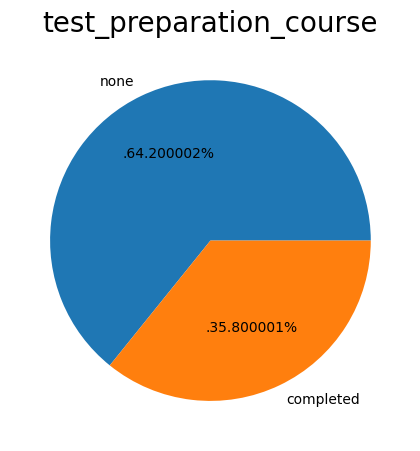

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)

plt.pie(data['test_preparation_course'].value_counts(), labels = data['test_preparation_course'].value_counts().index, autopct = '.%2f%%')
plt.title('test_preparation_course', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

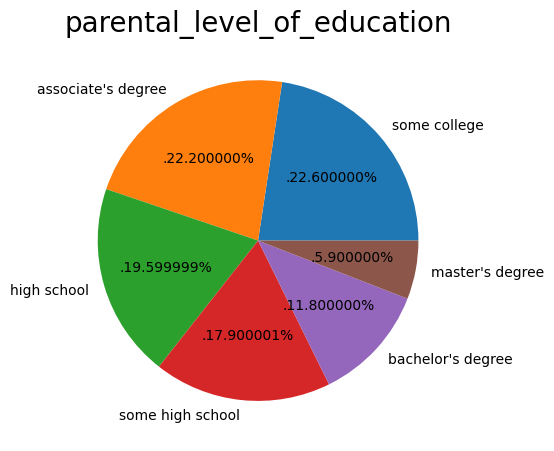

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)

plt.pie(data['parental_level_of_education'].value_counts(), labels = data['parental_level_of_education'].value_counts().index, autopct = '.%2f%%')
plt.title('parental_level_of_education', fontsize = 20)
plt.axis('off')

### Insights
    - Number of Male and Female Students are almost equal
    - Most of the Students have race_ethnicity of group C
    - 64% Students have done standard breakfast
    - Most of the students does'nt took test preperation course
    - Most Number of Students have parental_level_education of Some College and Associate Degree

### Feature Wise Visualization
##### GENDER COLUMN
##### UNIVARIATE ANALYSIS

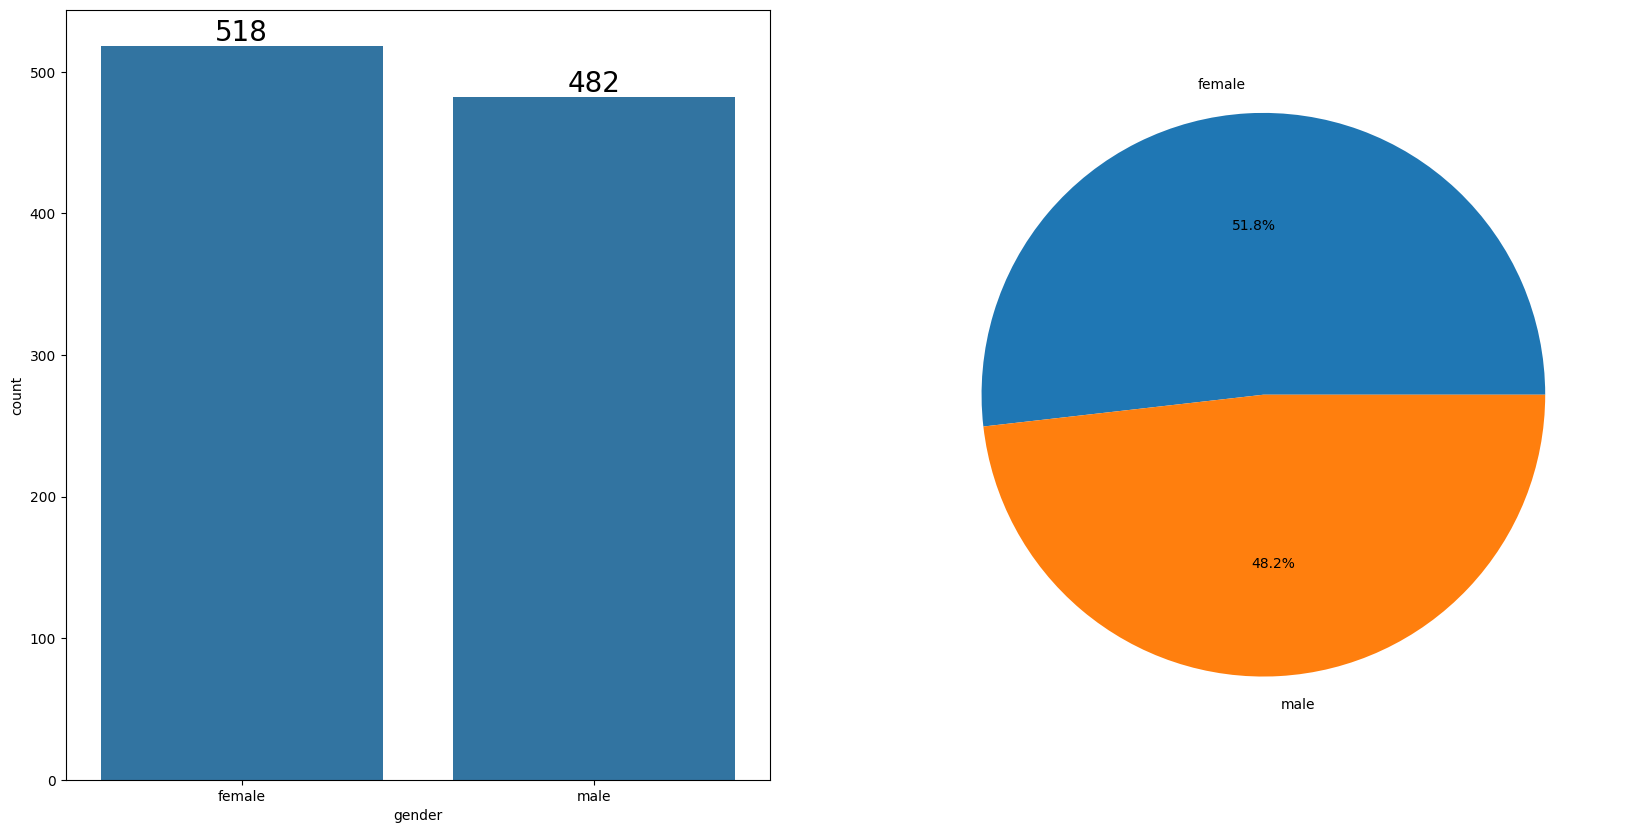

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=data['gender'].value_counts().index, autopct='%1.1f%%')
plt.show()

##### BIVARIATE ANALYSIS

In [106]:
gender_group = data.groupby('gender').mean()
gender_group

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\1318321921.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = data.groupby('gender').mean()


,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [107]:
[gender_group['average'][0], gender_group['math_score'][0]]

[69.56949806949807, 63.633204633204635]

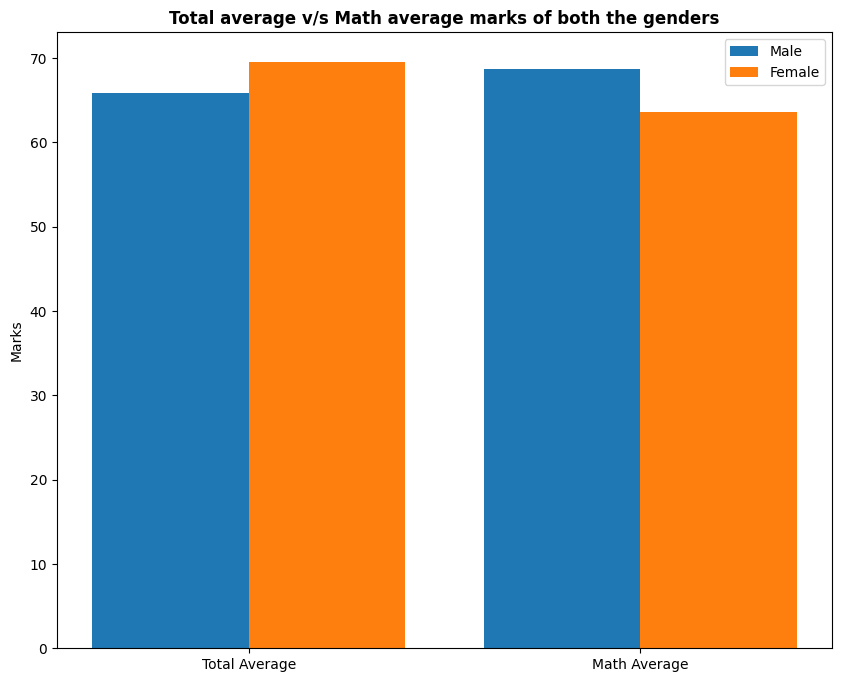

In [108]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insignts
- On an average Females have a better average then Males
- whereas males have scored higher in maths

##### RACE_ETHNICITY COLUMN (UNIVARIATE ANALYSIS)

In [126]:
race_ethnicity_group = data.groupby('race_ethnicity').mean()
race_ethnicity_group

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\902794974.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_ethnicity_group = data.groupby('race_ethnicity').mean()


,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


Text(0.5, 1.0, 'Writing score')

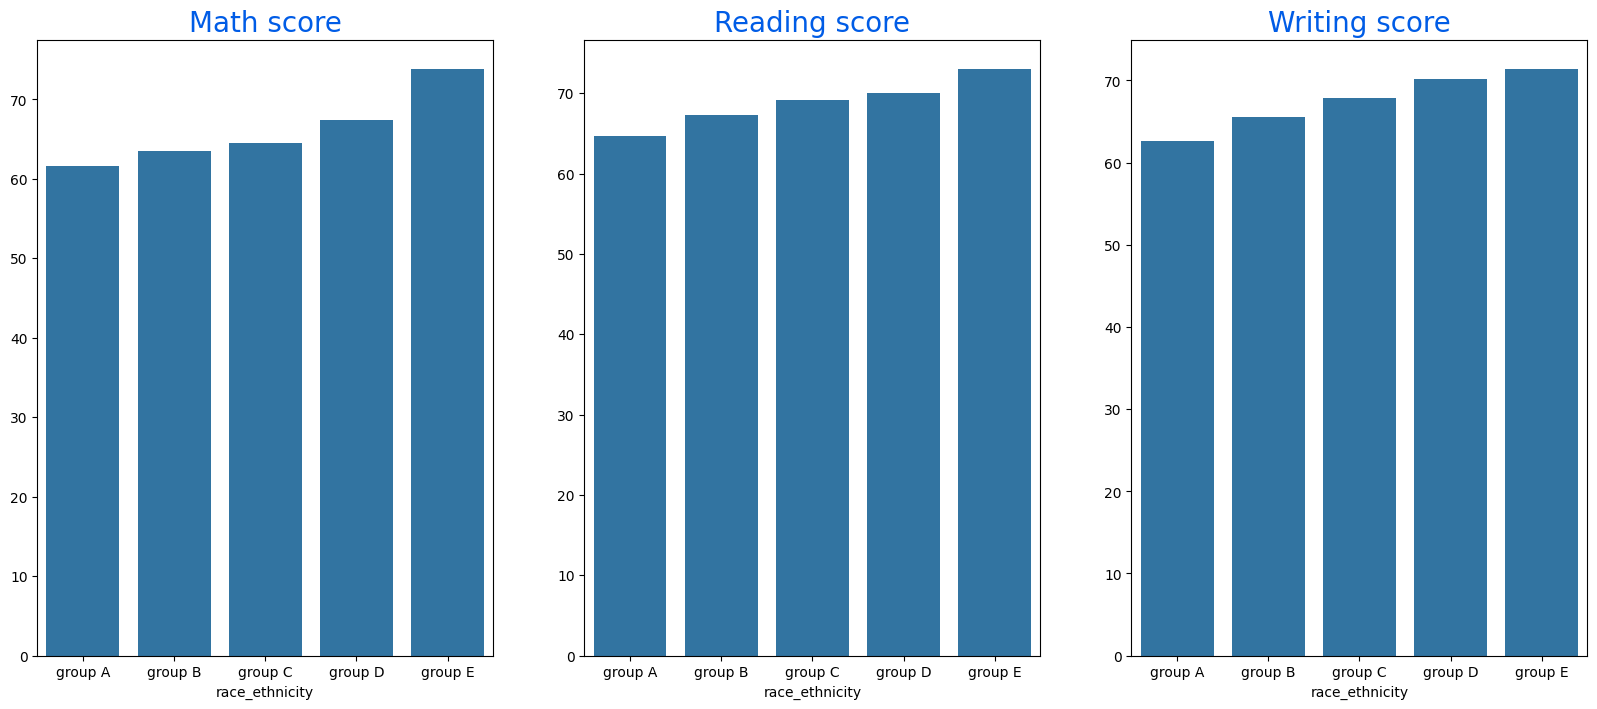

In [132]:
# Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_ethnicity_group['math_score'].index,y=race_ethnicity_group['math_score'].values ,ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

sns.barplot(x=race_ethnicity_group['reading_score'].index,y=race_ethnicity_group['reading_score'].values ,ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

sns.barplot(x=race_ethnicity_group['writing_score'].index,y=race_ethnicity_group['writing_score'].values ,ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)


##### Insights
- Found a Same Trend in math_score, reading_score and writing_score
- Students of Group E have greater average and Students of Group A have lowest average

##### PARENTAL LEVEL OF EDUCATION COLUMN (BIVARAITE ANALYSIS)

In [136]:
data.groupby('parental_level_of_education').mean()

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\4171346371.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('parental_level_of_education').mean()


,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


##### Insights
- The marks of students whole parents possess master or bachelor degree are higher then others

##### LUNCH COLUMN (BIVARIATE ANALYSIS)

In [138]:
lunch_group = data.groupby('lunch').mean()
lunch_group

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\1074334319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lunch_group = data.groupby('lunch').mean()


,math_score,reading_score,writing_score,total_score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


Text(0.5, 1.0, 'Reading score')

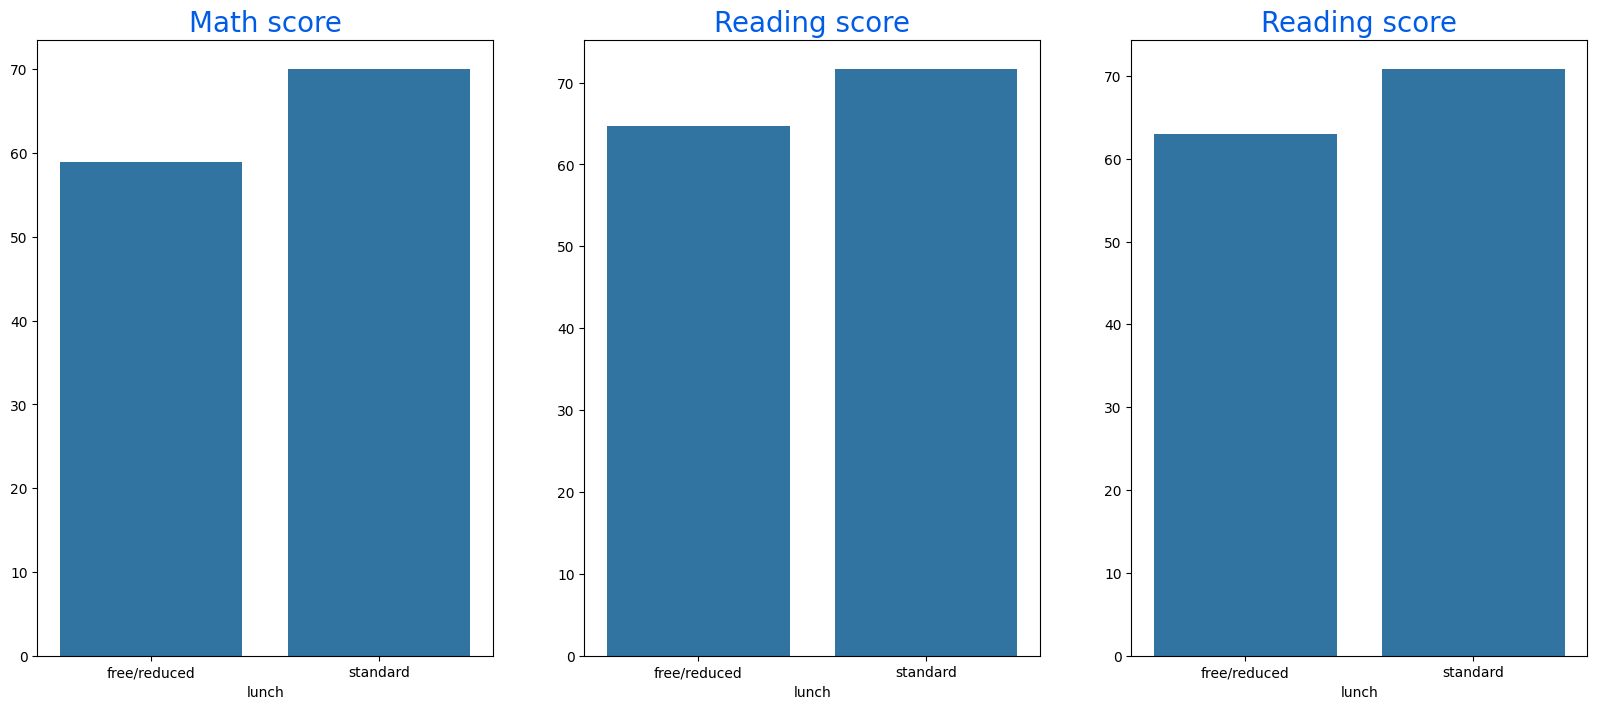

In [147]:
# Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=lunch_group['math_score'].index,y=lunch_group['math_score'].values ,ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

sns.barplot(x=lunch_group['reading_score'].index,y=lunch_group['reading_score'].values ,ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

sns.barplot(x=lunch_group['writing_score'].index,y=lunch_group['writing_score'].values ,ax=ax[2])
ax[2].set_title('Reading score',color='#005ce6',size=20)


##### Insights
- Students who did standard lunch have performed better then others who did free/reduced lunch

##### TEST_PREPERATION_COURSES COLUMN (BIVARIATE ANALYSIS)

In [144]:
test_preparation_course_group = data.groupby('test_preparation_course').mean()
test_preparation_course_group

C:\Users\NR\AppData\Local\Temp\ipykernel_14616\1344022542.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_preparation_course_group = data.groupby('test_preparation_course').mean()


,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


Text(0.5, 1.0, 'Reading score')

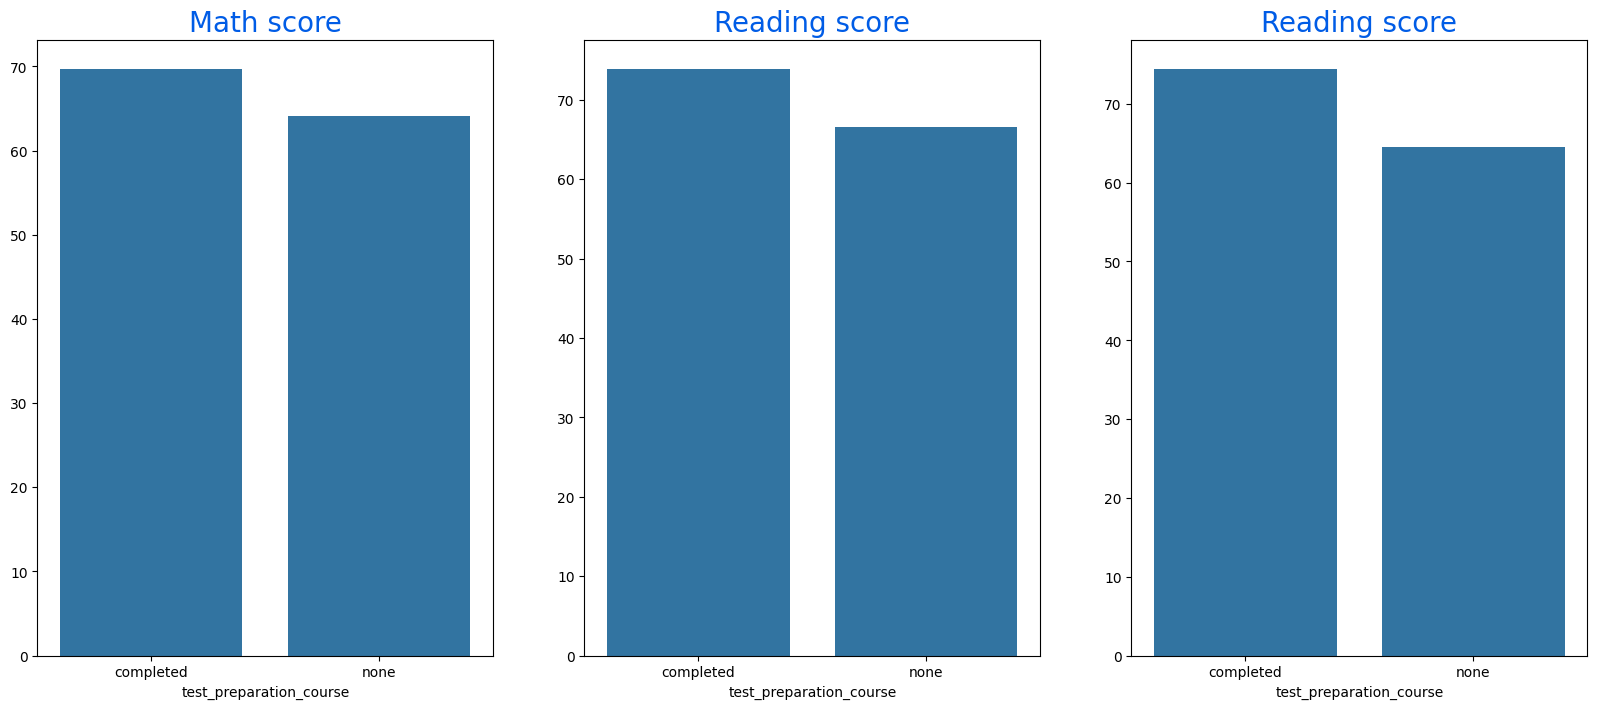

In [148]:
# Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=['math_score'].index,y=test_preparation_course_group['math_score'].values ,ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

sns.barplot(x=test_preparation_course_group['reading_score'].index,y=test_preparation_course_group['reading_score'].values ,ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

sns.barplot(x=test_preparation_course_group['writing_score'].index,y=test_preparation_course_group['writing_score'].values ,ax=ax[2])
ax[2].set_title('Reading score',color='#005ce6',size=20)


##### Insights
- Students who took test_preparation_course scored better then others

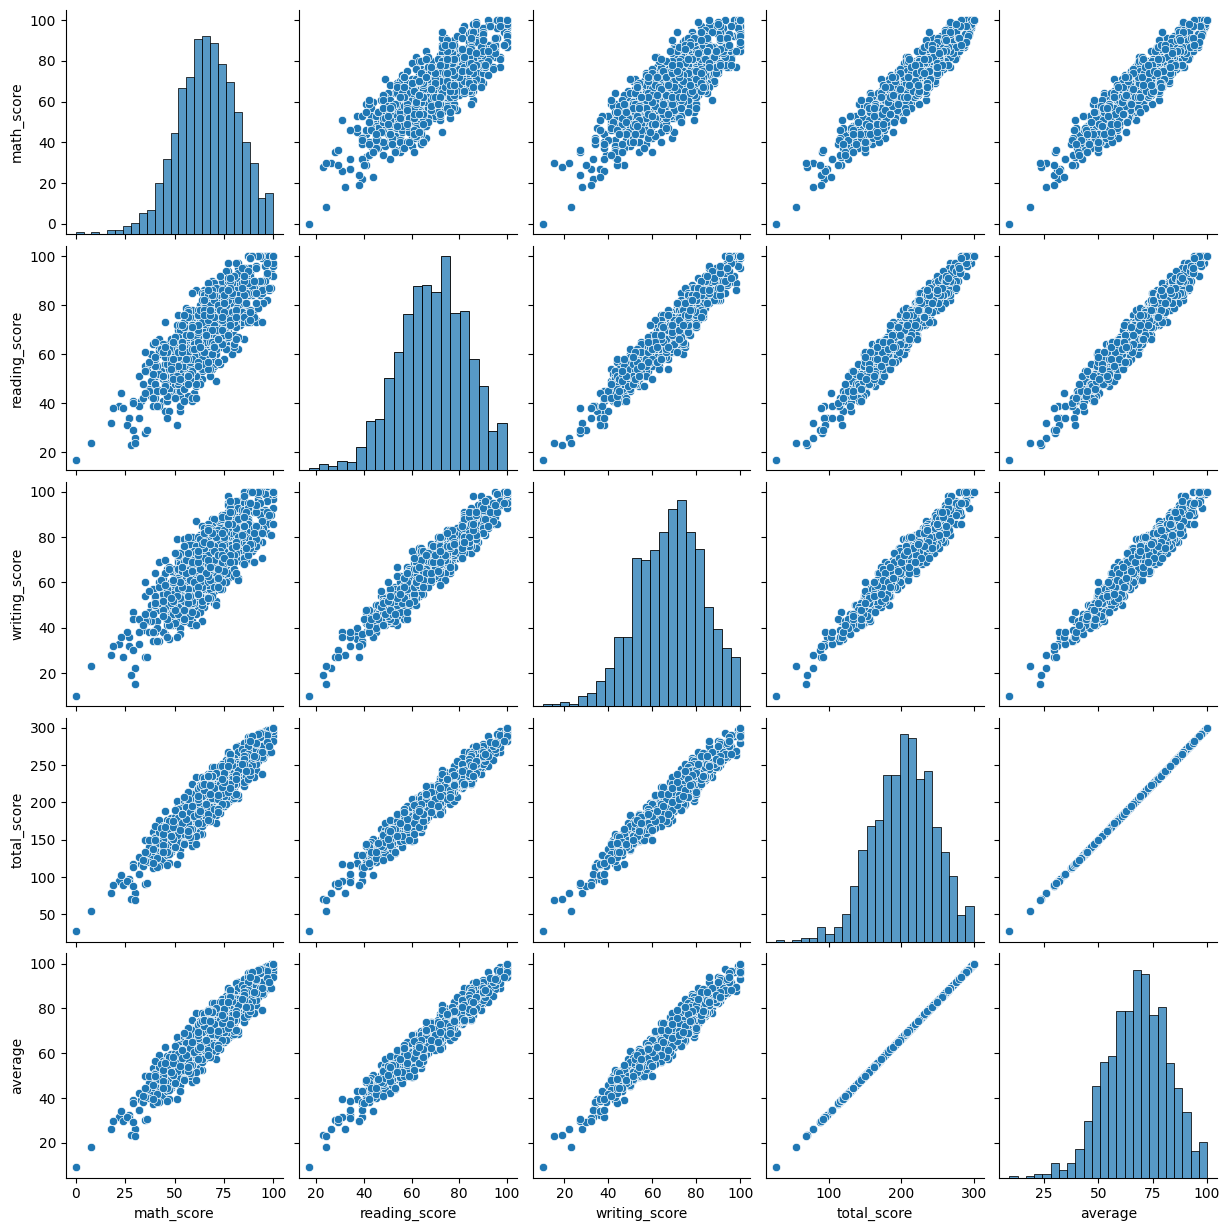

In [151]:
sns.pairplot(data)
# sns.pairplot(data,hue = 'gender')
plt.show()